<h1 style="background-color:skyblue; color:darkblue; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; font-size:40px;
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  VEHICLE DATASET
</h1>


<h1 style="background-color:darkblue; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:35px;">
  Importing Libraries, Algorithms And Metrics
</h1>


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
  Load Dataset
</h1>


In [5]:
data=pd.read_csv(r"C:\Users\niyas\Downloads\CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
Checking Columns,Shape,Info
</h1>


In [6]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
data.shape

(4340, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


<h1 style="background-color:darkblue; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:35px;">
Data-Preprocessing
</h1>

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
MISSING VALUE HANDLING
</h1>

In [9]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
for i in data:
    print(i)
    print(data[i].unique())
    print(data[i].nunique())

name
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
1491
year
[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
27
selling_price
[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  690000  555000

 
<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
Encoding
</h1>

In [11]:
le = LabelEncoder()
categorical_cols = ['name','fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2
4336,601,2014,409999,80000,1,1,1,2
4337,777,2009,110000,83000,4,1,1,2
4338,381,2016,865000,90000,1,1,1,0


In [12]:
dat=data.copy()

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
Scaling
</h1>

In [13]:
scaler=StandardScaler()

In [14]:
scaled= scaler.fit_transform(data)

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
PCA
</h1>

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
pca_data

array([[-1.16970498,  1.04405798],
       [-1.03961827,  1.0919361 ],
       [-0.14298406, -0.71253945],
       ...,
       [-1.63395052,  0.54579312],
       [ 0.67187834, -0.6435377 ],
       [ 0.11901482,  1.26672663]])

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
 K-means
</h1>

  File "c:\Users\niyas\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\niyas\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\niyas\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\niyas\anaconda3\Lib\subprocess.

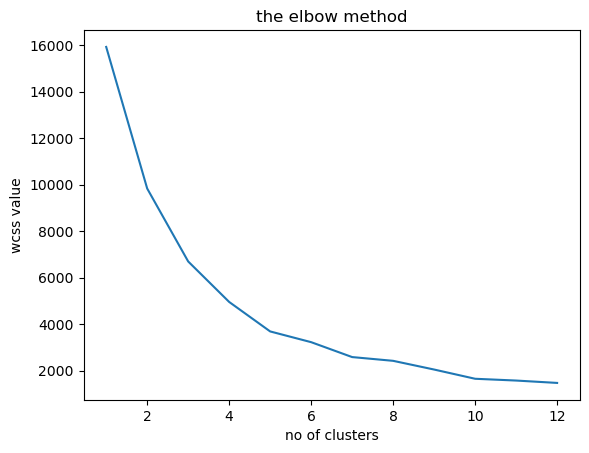

In [16]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss value')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmean=kmeans.fit_predict(pca_data)

In [18]:
y_kmean

array([1, 1, 0, ..., 1, 0, 3], dtype=int32)

In [19]:
score1=silhouette_score(pca_data,y_kmean)
print('silhouette_score:',score1)

silhouette_score: 0.44235197839695356


<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
DBSCAN CLUSTERING
</h1>

In [20]:
epsilon=0.6
min_samples=7
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels=dbscan.fit_predict(pca_data)
print(labels)

[0 0 0 ... 0 0 0]


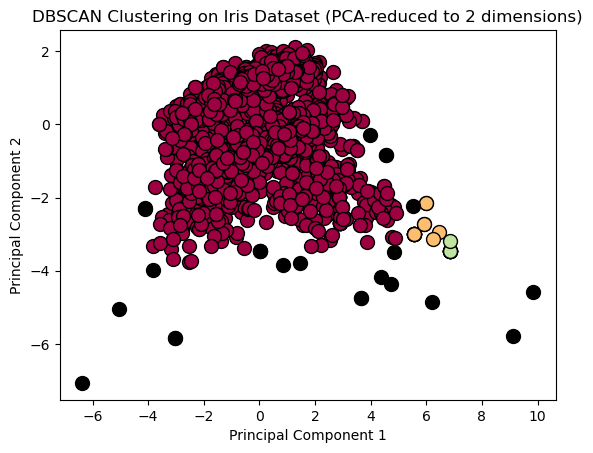

In [21]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [22]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [23]:
score2=silhouette_score(pca_data,labels)
print('silhouette_score:',score2)

silhouette_score: 0.6039632640004393


<h1 style="background-color:darkblue; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:35px;">
Hierarchical Clustering
</h1>

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
 Dendrogram
</h1>

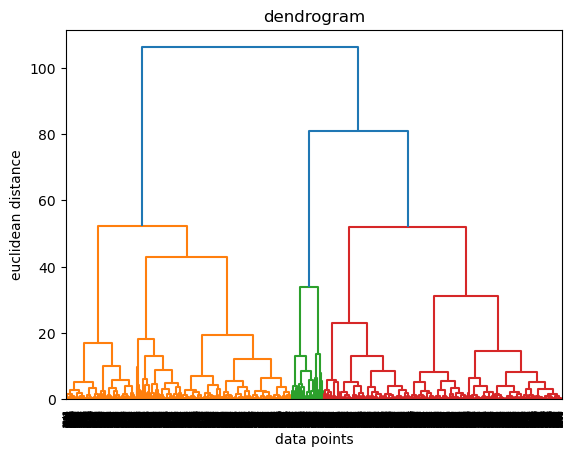

In [24]:
dendr=sch.dendrogram(sch.linkage(pca_data,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

##### The dendrogram shows the results of hierarchical clustering applied to the Iris dataset (after PCA reduction). It visually represents how data points are grouped into clusters based on their similarity (Euclidean distance), with the height indicating the distance at which clusters are merged. The color-coded branches represent different clusters formed at various levels of similarity.

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
Agglomerative Clustering
</h1>

In [25]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(pca_data)
y_ahc

array([1, 1, 1, ..., 1, 0, 0])

In [26]:
score3=silhouette_score(pca_data,y_ahc)
score3

np.float64(0.34710178288122323)

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
Fuzzy Clusturing
</h1>

In [27]:
data=pca_data.T

In [28]:
jm_values = []
cluster_range = range(2, 11)

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=data,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])  # Final objective value


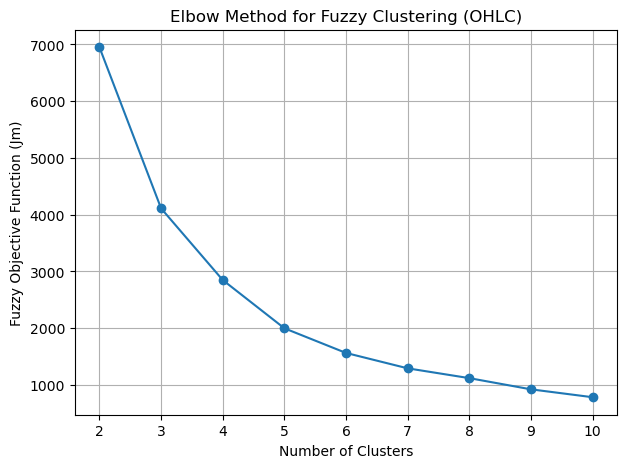

In [29]:
plt.figure(figsize=(7,5))
plt.plot(cluster_range, jm_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Objective Function (Jm)")
plt.title("Elbow Method for Fuzzy Clustering (OHLC)")
plt.grid(True)
plt.show()

In [30]:
n_clusters = 5

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000
)

In [31]:
hard_clusters = np.argmax(u, axis=0)

In [32]:
score4=silhouette_score(pca_data,hard_clusters)
print(score4)

0.4417573077771573


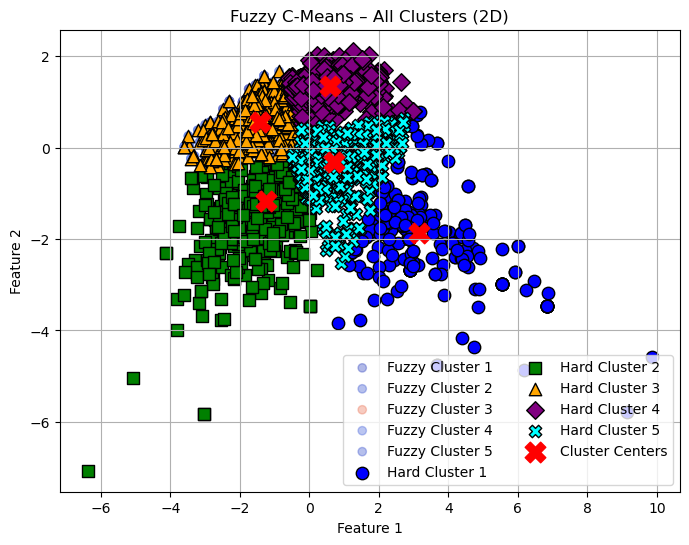

In [33]:


markers = ['o', 's', '^', 'D', 'X']
colors = ['blue', 'green', 'orange', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(
        data[0],        
        data[1],        
        c=u[i],
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Cluster {i+1}'
    )

hard_clusters = np.argmax(u, axis=0)  

for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(
        cluster_points[0], 
        cluster_points[1], 
        c=colors[i],      
        marker=markers[i], 
        edgecolor='k',    
        s=80,              
        label=f'Hard Cluster {i+1}' 
    )

ax.scatter(
    cntr[:, 0], 
    cntr[:, 1], 
    c='red',     
    marker='X',  
    s=220,      
    label='Cluster Centers'  
)

ax.set_title('Fuzzy C-Means – All Clusters (2D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

ax.legend(loc='lower right', ncol=2)
ax.grid(True)

plt.show()


##### The plot shows Fuzzy C-Means clustering applied to a 2D dataset, where points belong to multiple clusters with varying degrees of membership. It illustrates both fuzzy (partial) cluster assignments and hard (definitive) cluster memberships, with the cluster centers highlighted. The goal is to visualize how data points are grouped into clusters based on their feature values

<h1 style="background-color:; color:skyblue; text-align:center; padding: 8px; border-radius: 11px; font-weight: bold; font-family: 'Georgia', serif;font-size:28px;">
 Table
</h1>

In [34]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.442352 │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.603963 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.347102 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.441757 │
╘═════════════════════╧════════════════════╛


In [35]:
# Add cluster labels to the original dataframe
dat['DBSCAN_Cluster'] = labels  # assuming y_kmeans contains your cluster labels

# Numeric summary per cluster
cluster_summary = dat.groupby('DBSCAN_Cluster')[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']].mean().round(2)
cluster_summary['Count'] = dat['DBSCAN_Cluster'].value_counts()

# If you have categorical columns in the coin dataset, e.g., 'CoinType' and 'Exchange'
# if 'CoinType' in data.columns and 'Exchange' in data.columns:
#     cluster_summary['Most_Common_Coin'] = data.groupby('Kmeans_Cluster')['CoinType'].agg(lambda x: x.value_counts().idxmax())
#     cluster_summary['Most_Common_Exchange'] = data.groupby('Kmeans_Cluster')['Exchange'].agg(lambda x: x.value_counts().idxmax())

print("credict card dataset (DBSCAN c=3):")
print(cluster_summary)

credict card dataset (DBSCAN c=3):
                  name     year  selling_price  km_driven  fuel  seller_type  \
DBSCAN_Cluster                                                                 
-1              898.71  2014.17     2731666.67  188851.71  1.88         0.58   
 0              752.45  2013.05      465361.45   65854.10  2.48         0.80   
 1              831.29  2018.12     4005764.71   10854.24  1.35         0.12   
 2               38.25  2019.00     4937500.00   28583.25  1.00         0.00   

                transmission  owner  Count  
DBSCAN_Cluster                              
-1                      0.29   1.58     24  
 0                      0.91   0.82   4287  
 1                      0.00   0.00     17  
 2                      0.00   0.00     12  


In [36]:
dat['cluster']=labels
dat

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
0,775,2007,60000,70000,4,1,1,0,0,0
1,1041,2007,135000,50000,4,1,1,0,0,0
2,505,2012,600000,100000,1,1,1,0,0,0
3,118,2017,250000,46000,4,1,1,0,0,0
4,279,2014,450000,141000,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2,0,0
4336,601,2014,409999,80000,1,1,1,2,0,0
4337,777,2009,110000,83000,4,1,1,2,0,0
4338,381,2016,865000,90000,1,1,1,0,0,0


In [37]:
clsr1=dat.loc[dat['cluster']==0]
clsr1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
0,775,2007,60000,70000,4,1,1,0,0,0
1,1041,2007,135000,50000,4,1,1,0,0,0
2,505,2012,600000,100000,1,1,1,0,0,0
3,118,2017,250000,46000,4,1,1,0,0,0
4,279,2014,450000,141000,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2,0,0
4336,601,2014,409999,80000,1,1,1,2,0,0
4337,777,2009,110000,83000,4,1,1,2,0,0
4338,381,2016,865000,90000,1,1,1,0,0,0


In [38]:
clsr2=dat.loc[dat['cluster']==1]
clsr2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
101,1088,2018,4500000,9800,4,0,0,0,1,1
553,1079,2018,3800000,10000,1,0,0,0,1,1
572,1079,2018,3800000,10000,1,0,0,0,1,1
591,1079,2018,3800000,10000,1,0,0,0,1,1
610,1079,2018,3800000,10000,1,0,0,0,1,1
898,1079,2018,3800000,10000,1,0,0,0,1,1
917,1079,2018,3800000,10000,1,0,0,0,1,1
963,11,2020,4700000,1500,1,1,0,0,1,1
1021,1079,2018,3800000,10000,1,0,0,0,1,1
1834,1079,2018,3800000,10000,1,0,0,0,1,1


In [39]:
clsr3=dat.loc[dat['cluster']==2]
clsr3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
555,39,2019,4950000,30000,1,0,0,0,2,2
574,39,2019,4950000,30000,1,0,0,0,2,2
593,39,2019,4950000,30000,1,0,0,0,2,2
612,39,2019,4950000,30000,1,0,0,0,2,2
900,39,2019,4950000,30000,1,0,0,0,2,2
919,39,2019,4950000,30000,1,0,0,0,2,2
1023,39,2019,4950000,30000,1,0,0,0,2,2
1836,39,2019,4950000,30000,1,0,0,0,2,2
2239,39,2019,4950000,30000,1,0,0,0,2,2
2258,39,2019,4950000,30000,1,0,0,0,2,2


In [40]:
not_clsr=dat.loc[dat['cluster']==-1]
not_clsr

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
89,1097,2017,8150000,6500,1,0,0,0,-1,-1
525,939,2016,665000,560000,1,0,1,0,-1,-1
539,1089,2014,4400000,100000,1,1,0,2,-1,-1
731,619,2018,4000000,68000,1,1,0,0,-1,-1
1057,1179,2014,1200000,135000,1,1,0,4,-1,-1
1065,7,2018,3100000,22000,4,1,0,0,-1,-1
1243,999,2009,250000,806599,4,0,1,0,-1,-1
1479,9,2019,3256000,17000,1,0,0,0,-1,-1
1674,1445,2011,350000,312000,1,1,1,4,-1,-1
2178,1089,2014,4400000,100000,1,1,0,2,-1,-1


In [41]:
clsr1.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
count,4287.000000,4287.000000,4.287000e+03,4287.000000,4287.000000,4287.00000,4287.000000,4287.000000,4287.0,4287.0
mean,752.448332,2013.048286,4.653614e+05,65854.096571,2.480989,0.80056,0.906228,0.821554,0.0,0.0
std,398.004971,4.208933,4.165200e+05,43232.392262,1.508740,0.45530,0.291545,1.230398,0.0,0.0
min,0.000000,1992.000000,2.000000e+04,1.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
25%,432.000000,2011.000000,2.000000e+05,35000.000000,1.000000,1.00000,1.000000,0.000000,0.0,0.0
50%,793.000000,2014.000000,3.500000e+05,60000.000000,1.000000,1.00000,1.000000,0.000000,0.0,0.0
75%,1048.000000,2016.000000,6.000000e+05,90000.000000,4.000000,1.00000,1.000000,2.000000,0.0,0.0
max,1490.000000,2020.000000,4.000000e+06,350000.000000,4.000000,2.00000,1.000000,4.000000,0.0,0.0


In [42]:
clsr2.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
count,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.0
mean,831.294118,2018.117647,4.005765e+06,10854.235294,1.352941,0.117647,0.0,0.0,1.0,1.0
std,462.896420,0.485071,3.614067e+05,4665.423876,0.996317,0.332106,0.0,0.0,0.0,0.0
min,11.000000,2018.000000,3.800000e+06,1500.000000,1.000000,0.000000,0.0,0.0,1.0,1.0
25%,1079.000000,2018.000000,3.800000e+06,10000.000000,1.000000,0.000000,0.0,0.0,1.0,1.0
50%,1079.000000,2018.000000,3.800000e+06,10000.000000,1.000000,0.000000,0.0,0.0,1.0,1.0
75%,1079.000000,2018.000000,3.899000e+06,10000.000000,1.000000,0.000000,0.0,0.0,1.0,1.0
max,1088.000000,2020.000000,4.800000e+06,22000.000000,4.000000,1.000000,0.0,0.0,1.0,1.0


In [43]:
clsr3.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
count,12.000000,12.0,1.200000e+01,12.000000,12.0,12.0,12.0,12.0,12.0,12.0
mean,38.250000,2019.0,4.937500e+06,28583.250000,1.0,0.0,0.0,0.0,2.0,2.0
std,2.598076,0.0,4.330127e+04,4907.765963,0.0,0.0,0.0,0.0,0.0,0.0
min,30.000000,2019.0,4.800000e+06,12999.000000,1.0,0.0,0.0,0.0,2.0,2.0
25%,39.000000,2019.0,4.950000e+06,30000.000000,1.0,0.0,0.0,0.0,2.0,2.0
50%,39.000000,2019.0,4.950000e+06,30000.000000,1.0,0.0,0.0,0.0,2.0,2.0
75%,39.000000,2019.0,4.950000e+06,30000.000000,1.0,0.0,0.0,0.0,2.0,2.0
max,39.000000,2019.0,4.950000e+06,30000.000000,1.0,0.0,0.0,0.0,2.0,2.0


In [44]:
not_clsr.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,DBSCAN_Cluster,cluster
count,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.0
mean,898.708333,2014.166667,2.731667e+06,188851.708333,1.875000,0.583333,0.291667,1.583333,-1.0,-1.0
std,480.091701,3.522186,2.439075e+06,208338.785301,1.392917,0.503610,0.464306,1.863066,0.0,0.0
min,7.000000,2006.000000,7.500000e+04,6500.000000,1.000000,0.000000,0.000000,0.000000,-1.0,-1.0
25%,620.750000,2011.750000,6.650000e+05,56500.000000,1.000000,0.000000,0.000000,0.000000,-1.0,-1.0
50%,1089.000000,2014.000000,2.104500e+06,107996.000000,1.000000,1.000000,0.000000,0.000000,-1.0,-1.0
75%,1189.000000,2017.000000,4.250000e+06,300000.000000,4.000000,1.000000,1.000000,4.000000,-1.0,-1.0
max,1489.000000,2019.000000,8.900000e+06,806599.000000,4.000000,1.000000,1.000000,4.000000,-1.0,-1.0


| **Cluster**   | **Number of Entries** | **Most Frequent Car Model**              | **Cluster Distribution** | **Key Insights**                                                                                           |
| ------------- | --------------------- | ---------------------------------------- | ------------------------ | ---------------------------------------------------------------------------------------------------------- |
| **clust0**    | 4287                  | Maruti Swift Dzire VDI  (69)             | Cluster 0 is dominant    | - Large, diverse dataset with various vehicle types and conditions.                                        |
|               |                       |                                          |                          | - Selling price varies widely.                                                                             |                                 |
| **clust1**    | 17                    | Mercedes Benz C-Class Progressive C 220d (11) | Single cluster group     | - Smaller, focused dataset with consistent values for `owner` and `transmission` (First Owner, Automatic). |
|               |                       |                                          |                          | - Higher-end cars, likely newer with specific mileage and price ranges.                                    |
| **clust2**    | 12                    | BMW X5 xDrive 30d (11)                       | High variability         | - Smaller dataset with more variability in cluster values.                                                 |
|               |                       |                                          |                          | - Represents diverse vehicles (could be luxury, diverse types of cars).                                    |
| **clust-1** | 24                    | Skoda Octavia 1.9 TDI AT  (3)               | Outliers or exceptions   | - Represents cars that don't fit the main clusters.                                                        |
|               |                       |                                          |                          | - The dataset includes diverse and possibly unusual or outlier vehicles.                                   |
